In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

taiwan_real_estate = pd.read_csv('./taiwan_real_estate2.csv')

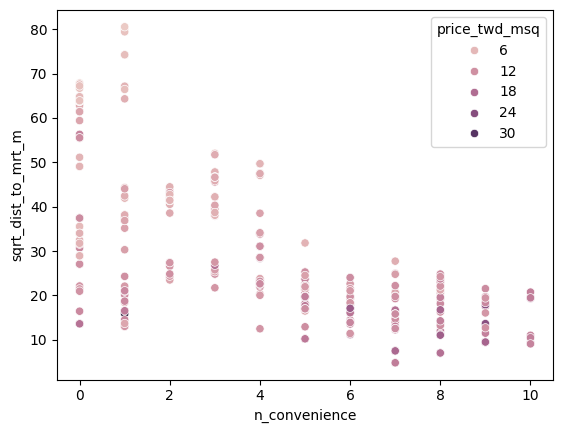

In [6]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=taiwan_real_estate,
                hue="price_twd_msq")

# Show the plot
plt.show()

In [8]:
from statsmodels.formula.api import ols
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64


In [10]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

from itertools import product
# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))
    
# See the result  
print(prediction_data)


    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


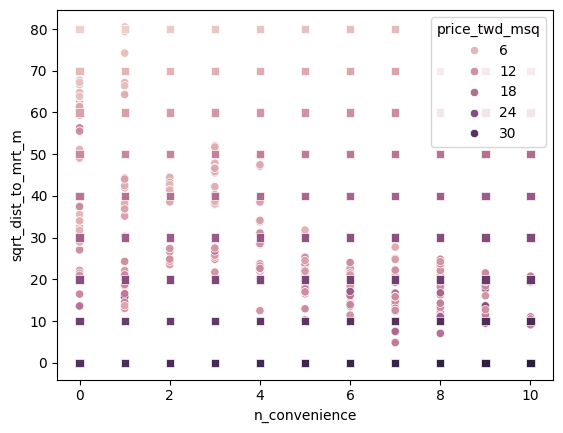

In [14]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", legend=False, marker="s")

# Show the plot
plt.show()

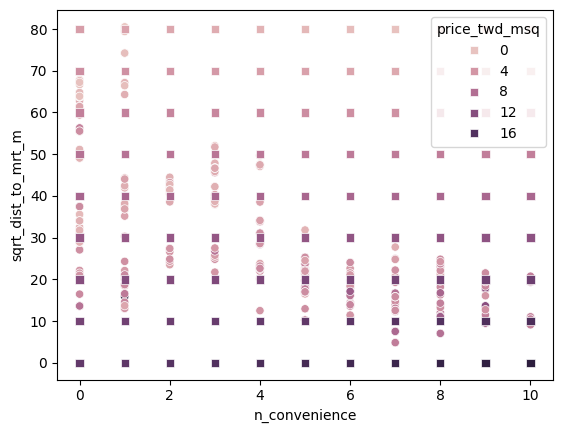

In [15]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

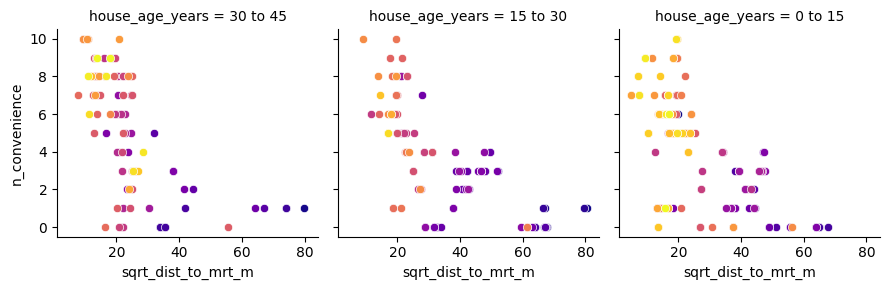

In [16]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
                     col="house_age_years",
                     hue="price_twd_msq", 
                     palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         "sqrt_dist_to_mrt_m",
         "n_convenience")

# Show the plot (brighter colors mean higher prices)
plt.show()

In [17]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + 0",
                                data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

house_age_years[0 to 15]     15.474464
house_age_years[15 to 30]    14.130059
house_age_years[30 to 45]    13.765494
n_convenience                 0.257666
sqrt_dist_to_mrt_m           -0.148102
dtype: float64


In [18]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0",
                                   data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [19]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (sqrt_dist_to_mrt_m + n_convenience + house_age_years) ** 2 + 0",
                                   data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m:n_convenience                  -0.008956
dtype: float64


In [20]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# See the result
print(explanatory_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years
0                0                   0        30 to 45
1                0                   0        15 to 30
2                0                   0         0 to 15
3                0                  10        30 to 45
4                0                  10        15 to 30
..             ...                 ...             ...
292             10                  70        15 to 30
293             10                  70         0 to 15
294             10                  80        30 to 45
295             10                  80        15 to 30
296             10                  80         0 to 15

[297 rows x 3 columns]


In [21]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


In [25]:
x_actual = [10,9,5,5,5,3,7,6,1,3,1,9,5,4,4,2,6,1,8,7,3,7,1,7,4,2,5,5,4,5,0,7,1,6,7,0,2,1,6,5,0,0,5,6,4,8,9,3,0,1,4,1,3,5,5,0,8,7,1,5,2,6,3,4,0,8,6,5,6,5,9,3,8,0,10,1,3,3,2,1,4,6,7,3,7,9,1,0,0,0,1,0,4,0,5,5,9,3,5,9,4,1,6,6,6,6,8,1,2,3,5,7,3,6,8,2,1,0,3,5,5,5,4,0,7,6,4,5,6,7,8,3,5,8,6,0,5,6,0,5,5,3,5,5,1,5,0,8,0,8,7,9,1,6,0,0,0,4,5,4,8,3,0,5,0,1,6,8,5,1,0,5,9,4,7,3,0,9,4,1,0,8,3,0,0,3,3,0,8,0,8,2,7,5,0,5,2,8,7,8,0,5,3,5,1,3,10,3,1,8,5,1,2,9,3,8,1,6,5,8,9,0,10,0,6,6,0,8,0,0,3,0,1,9,4,7,10,0,0,0,2,7,3,8,3,5,6,0,0,1,7,0,9,2,5,1,1,1,6,0,4,3,5,3,7,4,3,5,5,0,1,8,5,1,7,7,5,3,6,3,6,9,1,2,7,3,9,5,6,5,0,7,5,7,6,3,4,4,0,10,4,0,3,0,3,5,1,0,5,0,2,4,9,5,6,2,7,2,10,5,0,4,1,6,2,8,7,3,3,0,0,0,2,5,5,6,2,5,9,5,0,2,9,8,0,0,2,1,6,5,5,3,3,3,1,5,1,9,6,0,10,8,4,10,7,4,1,2,1,3,5,5,7,1,5,0,2,8,8,6,5,9,0,4,0,10,0,3,4,8,9,1,6,4,1,4,1,4,2,1,5,3,1,9,5,6,7,0,3,0,9,7,5,9]
y_actual = [11.467473524962026,12.768532526474868,14.31164901664126,16.58093797276831,13.040847201210116,9.712556732223774,12.19364599092268,14.1301059001511,5.688350983358472,6.686838124054374,12.526475037821315,17.579425113464215,11.89107413010574,7.201210287443172,10.37821482602104,15.279878971255467,21.210287443267493,11.316187594553554,12.79878971255656,14.43267776096804,8.865355521936342,15.612708018154104,7.443267776096724,14.493192133131425,11.739788199697273,8.16944024205738,17.00453857791203,10.166414523449184,14.22087745839618,17.276853252647275,6.686838124054374,7.5642965204234995,10.347957639939349,14.91679273827514,16.671709531013395,8.260211800302462,6.928895612707925,7.655068078668582,14.43267776096804,13.978819969742627,4.810892586989346,5.506807866868307,10.49924357034782,10.317700453857654,16.308623298033066,11.5885022692888,12.70801815431148,18.60816944024181,4.054462934946996,3.993948562783608,13.373676248108747,6.263237518910658,8.16944024205738,11.770045385778966,15.642965204235798,4.145234493192078,12.677760968229784,16.18759455370629,6.8381240544628445,12.829046898638255,6.444780635400822,19.12254160363061,8.381240544629238,16.6414523449317,7.655068078668582,13.40393343419044,15.340393343418858,17.18608169440219,10.953101361573228,12.70801815431148,17.85173978819946,12.34493192133115,10.98335854765492,6.051437216338799,16.459909228441536,8.92586989409973,11.134644478063391,7.745839636913664,9.016641452344812,8.01815431164891,12.19364599092268,11.134644478063391,14.553706505294814,5.355521936459837,13.222390317700278,15.37065052950055,8.16944024205738,5.537065052950002,14.52344931921312,7.655068078668582,13.736762481089077,13.071104387291808,6.596066565809292,4.871406959152735,12.40544629349454,15.673222390317491,18.00302571860793,10.468986384266124,15.43116490166394,18.81996974281367,11.558245083207108,9.954614220877325,16.459909228441536,13.82753403933416,9.22844175491667,21.482602118002735,14.251134644477874,8.048411497730605,10.317700453857654,8.593040847201095,15.612708018154104,11.921331316187436,6.9894099848713145,2.299546142208744,16.1270801815429,14.039334341906017,3.691376701966668,3.93343419062022,9.258698940998364,18.033282904689624,9.470499243570222,14.52344931921312,9.83358547655055,13.76701966717077,17.367624810892355,14.704992435703284,19.031770045385525,16.6414523449317,18.36611195158826,12.40544629349454,11.346444780635249,9.288956127080056,11.346444780635249,11.951588502269129,12.768532526474868,6.293494704992352,14.16036308623279,14.341906202722956,13.16187594553689,12.85930408471995,15.552193645990714,8.744326777609565,11.346444780635249,12.133131618759291,8.593040847201095,13.76701966717077,15.794251134644268,13.071104387291808,13.645990922843994,12.012102874432518,14.67473524962159,13.524962178517216,8.744326777609565,12.375189107412846,6.263237518910658,4.720121028744264,5.537065052950002,10.771558245083064,11.921331316187436,11.316187594553554,17.48865355521913,11.981845688350823,3.509833585476504,16.79273827534017,16.70196671709509,9.258698940998364,22.269288956126783,13.131618759455195,11.316187594553554,7.11043872919809,4.357034795763936,17.79122541603607,17.579425113464215,10.620272314674594,13.676248108925687,11.043872919818307,5.809379727685248,12.70801815431148,11.104387291981698,12.889561270801645,4.68986384266257,16.913767019666945,7.140695915279784,5.688350983358472,6.596066565809292,6.50529500756421,7.776096822995357,6.65658093797268,13.40393343419044,6.20272314674727,12.79878971255656,11.437216338880331,12.919818456883338,14.91679273827514,8.865355521936342,10.468986384266124,11.074130105900004,14.583963691376509,11.830559757942352,9.561270801815304,7.7155824508319695,13.888048411497545,9.53101361573361,13.948562783660934,8.048411497730605,6.475037821482515,13.31316187594536,10.347957639939349,7.927382753403827,12.375189107412846,15.794251134644268,13.16187594553689,9.409984871406834,17.54916792738252,6.323751891074045,14.553706505294814,12.012102874432518,12.34493192133115,13.25264750378197,12.163388804840988,23.6913767019664,11.649016641452189,14.67473524962159,12.79878971255656,13.91830559757924,14.82602118003006,3.872919818456832,12.163388804840988,14.099848714069404,5.748865355521859,10.105900151285796,4.447806354009018,5.264750378214755,9.803328290468857,7.231467473524865,11.89107413010574,18.729198184568585,11.80030257186066,12.284417549167763,8.986384266263117,8.714069591527872,12.526475037821315,10.105900151285796,14.583963691376509,6.565809379727598,12.34493192133115,12.284417549167763,6.9894099848713145,6.747352496217762,4.5385779122541,9.0771558245082,4.175491679273772,15.945537065052738,7.836611195158746,15.673222390317491,5.264750378214755,8.01815431164891,13.282904689863663,19.1527987897123,8.714069591527872,9.288956127080056,7.382753403933335,16.03630862329782,9.591527987896995,12.284417549167763,11.527987897125412,7.170953101361477,12.435703479576231,12.133131618759291,6.95915279878962,35.55219364599045,8.01815431164891,12.25416036308607,8.865355521936342,12.40544629349454,15.03782148260192,10.28744326777596,8.381240544629238,13.31316187594536,9.409984871406834,13.736762481089077,13.55521936459891,7.745839636913664,7.11043872919809,10.408472012102736,16.73222390317678,17.03479576399372,9.954614220877325,15.43116490166394,13.46444780635383,11.19515885022678,16.459909228441536,7.41301059001503,12.85930408471995,11.527987897125412,6.596066565809292,10.317700453857654,8.62329803328279,5.052950075642897,13.948562783660934,11.164901664145084,10.80181543116476,7.019667170953007,11.618759455370496,8.895612708018035,16.6414523449317,15.189107413010388,7.473524962178417,16.03630862329782,5.779122541603554,7.473524962178417,12.768532526474868,23.60060514372132,12.95007564296503,12.586989409984705,8.260211800302462,12.70801815431148,11.346444780635249,15.06807866868361,8.139183055975685,5.627836611195084,11.406959152798638,10.015128593040714,12.85930408471995,9.470499243570222,11.527987897125412,18.78971255673197,11.104387291981698,7.140695915279784,5.809379727685248,3.872919818456832,4.720121028744264,11.981845688350823,11.618759455370496,6.898638426626232,11.043872919818307,10.771558245083064,9.349470499243443,10.98335854765492,15.249621785173774,12.980332829046723,11.19515885022678,16.18759455370629,14.099848714069404,12.465960665657928,11.467473524962026,9.319213313161752,3.388804841149728,16.24810892586968,14.22087745839618,12.79878971255656,8.653555219364485,7.776096822995357,9.470499243570222,9.107413010589894,18.36611195158826,13.70650529500738,13.585476550680603,13.645990922843994,7.473524962178417,14.251134644477874,19.1527987897123,12.1028744326776,14.52344931921312,10.015128593040714,8.92586989409973,7.503782148260112,6.323751891074045,13.040847201210116,6.898638426626232,12.738275340393171,15.642965204235798,12.55673222390301,15.794251134644268,14.97730711043853,7.201210287443172,9.22844175491667,17.18608169440219,11.316187594553554,21.08925869894072,16.1270801815429,14.31164901664126,8.865355521936342,12.19364599092268,3.903177004538526,14.099848714069404,16.73222390317678,7.745839636913664,8.260211800302462,20.48411497730684,11.679273827533883,9.470499243570222,10.68078668683798,12.19364599092268,7.473524962178417,12.85930408471995,9.652042360060385,9.742813918305467,6.95915279878962,11.28593040847186,10.741301059001367,8.381240544629238,8.62329803328279,12.012102874432518,12.465960665657928,11.255673222390168,12.25416036308607,6.747352496217762,8.502269288956015,4.659606656580876,15.128593040847,12.284417549167763,15.885022692889349,19.334341906202464]

In [28]:
x_actual = np.array(x_actual)
y_actual = np.array(y_actual)

In [29]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_actual - y_pred
    # Calculate sum of squares
    sum_sq = (y_diff**2).sum()
    # Return sum of squares
    return sum_sq
# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

7667.734402786995


In [30]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

from scipy.optimize import minimize
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0, 0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4717.68623992569
        x: [ 8.224e+00  7.981e-01]
      nit: 4
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.547e-03 -5.713e-04]
            [-5.713e-04  1.395e-04]]
     nfev: 18
     njev: 6
Intercept        8.224237
n_convenience    0.798080
dtype: float64
